In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/4.1/Pattern/glaucoma_dataset.csv')

In [6]:
df.head(10)

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,None,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma
5,12544,88,Female,20/40,24.66,0.58,No,None,"Ibuprofen, Omeprazole, Atorvastatin, Aspirin, ...","Sensitivity: 0.87, Specificity: 0.72","RNFL Thickness: 98.01 µm, GCC Thickness: 56.11...",562.15,Absent,Closed,"Eye pain, Eye pain, Eye pain",No Glaucoma,Juvenile Glaucoma
6,57342,46,Male,20/40,16.43,0.39,Yes,Diabetes,"Omeprazole, Ibuprofen, Amoxicillin, Atorvastat...","Sensitivity: 0.7, Specificity: 0.96","RNFL Thickness: 77.92 µm, GCC Thickness: 62.46...",523.05,Present,Open,"Nausea, Nausea, Vomiting",Glaucoma,Juvenile Glaucoma
7,71427,66,Female,LogMAR 0.1,22.33,0.46,No,Hypertension,"Ibuprofen, Aspirin","Sensitivity: 0.98, Specificity: 0.83","RNFL Thickness: 95.72 µm, GCC Thickness: 58.81...",552.21,Absent,Open,"Eye pain, Nausea, Halos around lights",No Glaucoma,Primary Open-Angle Glaucoma
8,98588,60,Male,LogMAR 0.0,12.67,0.52,Yes,Diabetes,"Ibuprofen, Atorvastatin, Metformin","Sensitivity: 0.97, Specificity: 0.73","RNFL Thickness: 83.78 µm, GCC Thickness: 56.93...",520.38,Absent,Open,"Blurred vision, Vision loss, Nausea",Glaucoma,Primary Open-Angle Glaucoma
9,4814,29,Male,20/20,11.40,0.37,No,None,NaN,"Sensitivity: 0.94, Specificity: 0.78","RNFL Thickness: 80.37 µm, GCC Thickness: 67.89...",574.23,Present,Closed,"Redness in the eye, Vomiting, Vision loss",No Glaucoma,Congenital Glaucoma


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             10000 non-null  object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

In [8]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

Medication Usage                              12.31
Visual Field Test Results                      0.00
Diagnosis                                      0.00
Visual Symptoms                                0.00
Angle Closure Status                           0.00
Cataract Status                                0.00
Pachymetry                                     0.00
Optical Coherence Tomography (OCT) Results     0.00
Patient ID                                     0.00
Age                                            0.00
Medical History                                0.00
Family History                                 0.00
Cup-to-Disc Ratio (CDR)                        0.00
Intraocular Pressure (IOP)                     0.00
Visual Acuity Measurements                     0.00
Gender                                         0.00
Glaucoma Type                                  0.00
dtype: float64

In [9]:
print('Before', df.shape)
df = df.dropna()
print('After:', df.shape)

Before (10000, 17)
After: (8769, 17)


In [10]:
display(df.describe(include='object'))

,Gender,Visual Acuity Measurements,Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
count,8769,8769,8769,8769,8769,8769,8769,8769,8769,8769,8769,8769
unique,2,4,2,4,4079,1564,8769,2,2,512,2,6
top,Male,LogMAR 0.0,No,None,Amoxicillin,"Sensitivity: 0.83, Specificity: 0.73","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",Absent,Closed,"Vision loss, Halos around lights, Blurred vision",No Glaucoma,Juvenile Glaucoma
freq,4406,2235,4421,2218,222,15,1,4460,4438,32,4387,1512


In [11]:
display(df.columns)

Index(['Patient ID', 'Age', 'Gender', 'Visual Acuity Measurements',
       'Intraocular Pressure (IOP)', 'Cup-to-Disc Ratio (CDR)',
       'Family History', 'Medical History', 'Medication Usage',
       'Visual Field Test Results',
       'Optical Coherence Tomography (OCT) Results', 'Pachymetry',
       'Cataract Status', 'Angle Closure Status', 'Visual Symptoms',
       'Diagnosis', 'Glaucoma Type'],
      dtype='object')

In [12]:
df['Diagnosis'] = (df['Diagnosis'] == 'Glaucoma').astype(int)

In [13]:
df = pd.get_dummies(df, columns=['Gender', 'Visual Acuity Measurements', 'Family History', 'Medical History', 'Cataract Status', 'Angle Closure Status', 'Glaucoma Type'])

In [14]:
df['Visual Field Test Results'].unique()

array(['Sensitivity: 0.54, Specificity: 0.75',
       'Sensitivity: 0.72, Specificity: 0.88',
       'Sensitivity: 0.56, Specificity: 0.8', ...,
       'Sensitivity: 0.54, Specificity: 0.87',
       'Sensitivity: 0.69, Specificity: 1.0',
       'Sensitivity: 0.5, Specificity: 0.95'], dtype=object)

In [15]:
df[['Visual_Sensitivity', 'Visual_Specificity']] = df['Visual Field Test Results'].str.split(',', expand=True).replace(to_replace='[^0-9.]', value='', regex=True).astype(float)

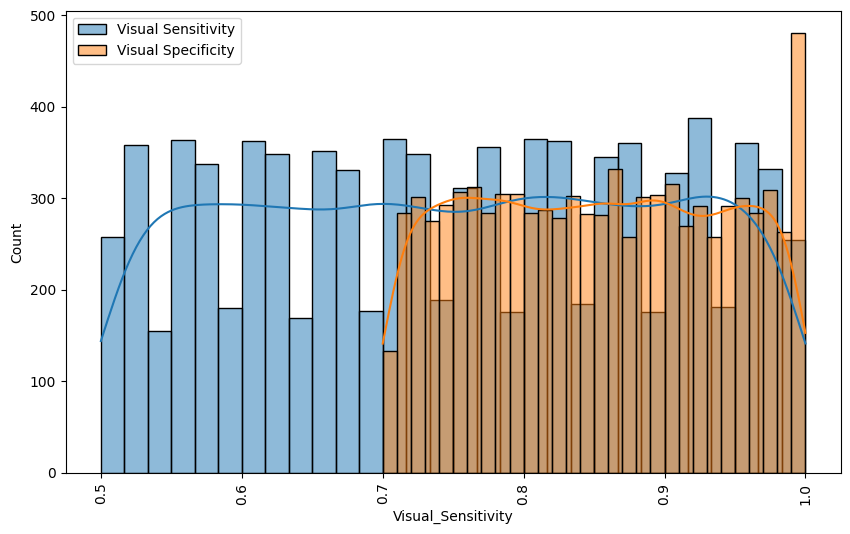

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Visual_Sensitivity', label='Visual Sensitivity', kde=True, bins = 30)
sns.histplot(data=df, x='Visual_Specificity', label='Visual Specificity', kde=True, bins = 30)

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [17]:
df['Optical Coherence Tomography (OCT) Results'].values

array(['RNFL Thickness: 86.48 µm, GCC Thickness: 64.14 µm, Retinal Volume: 5.63 mm³, Macular Thickness: 283.67 µm',
       'RNFL Thickness: 96.88 µm, GCC Thickness: 56.48 µm, Retinal Volume: 5.69 mm³, Macular Thickness: 261.48 µm',
       'RNFL Thickness: 89.81 µm, GCC Thickness: 59.05 µm, Retinal Volume: 5.96 mm³, Macular Thickness: 282.34 µm',
       ...,
       'RNFL Thickness: 83.04 µm, GCC Thickness: 63.24 µm, Retinal Volume: 6.13 mm³, Macular Thickness: 268.39 µm',
       'RNFL Thickness: 95.93 µm, GCC Thickness: 59.78 µm, Retinal Volume: 5.85 mm³, Macular Thickness: 280.84 µm',
       'RNFL Thickness: 88.77 µm, GCC Thickness: 58.74 µm, Retinal Volume: 5.87 mm³, Macular Thickness: 262.64 µm'],
      dtype=object)

In [18]:
df[['RNFL Thickness (µm)', 'GCC Thickness (µm)', 'Retinal Volume (mm³)', 'Macular Thickness (µm)']] = df['Optical Coherence Tomography (OCT) Results'].str.split(',', expand=True)

In [19]:
df['RNFL Thickness (µm)'] = df['RNFL Thickness (µm)'].str.replace('[^0-9.]', '', regex=True).astype(float)
df['GCC Thickness (µm)'] = df['GCC Thickness (µm)'].str.replace('[^0-9.]', '', regex=True).astype(float)
df['Retinal Volume (mm³)'] = df['Retinal Volume (mm³)'].str.replace('[^0-9.]', '', regex=True).astype(float)
df['Macular Thickness (µm)'] = df['Macular Thickness (µm)'].str.replace('[^0-9.]', '', regex=True).astype(float)

In [20]:
df[['RNFL Thickness (µm)', 'GCC Thickness (µm)', 'Retinal Volume (mm³)', 'Macular Thickness (µm)']]

,RNFL Thickness (µm),GCC Thickness (µm),Retinal Volume (mm³),Macular Thickness (µm)
0,86.48,64.14,5.63,283.67
1,96.88,56.48,5.69,261.48
2,89.81,59.05,5.96,282.34
3,87.25,63.98,6.44,262.86
4,82.61,66.01,6.16,261.78
...,...,...,...,...
9992,97.75,60.64,6.09,272.96
9993,99.24,58.82,5.86,283.60
9996,83.04,63.24,6.13,268.39
9997,95.93,59.78,5.85,280.84


In [21]:
df.drop(columns=['Visual Field Test Results', 'Optical Coherence Tomography (OCT) Results'], inplace=True)

In [22]:
split_values = df['Visual Symptoms'].str.split(', ')
unique_symptoms = set(symptom for symptoms in split_values for symptom in symptoms)
for symptom in unique_symptoms:
    df[symptom] = split_values.apply(lambda x: 1 if symptom in x else 0)
df = df.drop('Visual Symptoms', axis=1)

In [23]:
split_values2 = df['Medication Usage'].str.split(', ')

unique_symptoms = set(symptom for symptoms in split_values2 for symptom in symptoms)
for symptom in unique_symptoms:
    df[symptom] = split_values2.apply(lambda x: 1 if symptom in x else 0)
df = df.drop('Medication Usage', axis=1)

In [24]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [25]:
df.dtypes

Patient ID                                     int64
Age                                            int64
Intraocular Pressure (IOP)                   float64
Cup-to-Disc Ratio (CDR)                      float64
Pachymetry                                   float64
Diagnosis                                      int64
Gender_Female                                  uint8
Gender_Male                                    uint8
Visual Acuity Measurements_20/20               uint8
Visual Acuity Measurements_20/40               uint8
Visual Acuity Measurements_LogMAR 0.0          uint8
Visual Acuity Measurements_LogMAR 0.1          uint8
Family History_No                              uint8
Family History_Yes                             uint8
Medical History_Diabetes                       uint8
Medical History_Glaucoma in family             uint8
Medical History_Hypertension                   uint8
Medical History_None                           uint8
Cataract Status_Absent                        

In [26]:
df.head(5)

,Patient ID,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry,Diagnosis,Gender_Female,Gender_Male,Visual Acuity Measurements_20/20,Visual Acuity Measurements_20/40,...,Blurred vision,Vision loss,Eye pain,Omeprazole,Metformin,Amoxicillin,Ibuprofen,Lisinopril,Aspirin,Atorvastatin
0,62431,69,19.46,0.42,541.51,0,0,1,0,0,...,0,0,1,1,1,1,1,1,1,1
1,68125,69,18.39,0.72,552.77,0,1,0,0,0,...,0,1,0,1,0,1,1,1,0,1
2,63329,67,23.65,0.72,573.65,0,1,0,0,1,...,0,1,0,0,1,1,1,1,1,1
3,47174,23,18.04,0.61,590.67,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,67361,21,15.87,0.30,588.41,0,0,1,0,0,...,0,0,1,1,0,1,1,0,1,1


In [27]:
df.head(20)

,Patient ID,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry,Diagnosis,Gender_Female,Gender_Male,Visual Acuity Measurements_20/20,Visual Acuity Measurements_20/40,...,Blurred vision,Vision loss,Eye pain,Omeprazole,Metformin,Amoxicillin,Ibuprofen,Lisinopril,Aspirin,Atorvastatin
0,62431,69,19.46,0.42,541.51,0,0,1,0,0,...,0,0,1,1,1,1,1,1,1,1
1,68125,69,18.39,0.72,552.77,0,1,0,0,0,...,0,1,0,1,0,1,1,1,0,1
2,63329,67,23.65,0.72,573.65,0,1,0,0,1,...,0,1,0,0,1,1,1,1,1,1
3,47174,23,18.04,0.61,590.67,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,67361,21,15.87,0.30,588.41,0,0,1,0,0,...,0,0,1,1,0,1,1,0,1,1
5,12544,88,24.66,0.58,562.15,0,1,0,0,1,...,0,0,1,1,1,0,1,0,1,1
6,57342,46,16.43,0.39,523.05,1,0,1,0,1,...,0,0,0,1,0,1,1,0,1,1
7,71427,66,22.33,0.46,552.21,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
8,98588,60,12.67,0.52,520.38,1,0,1,0,0,...,1,1,0,0,1,0,1,0,0,1
10,61485,61,12.60,0.71,521.40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
correlation_matrix = df.corr()

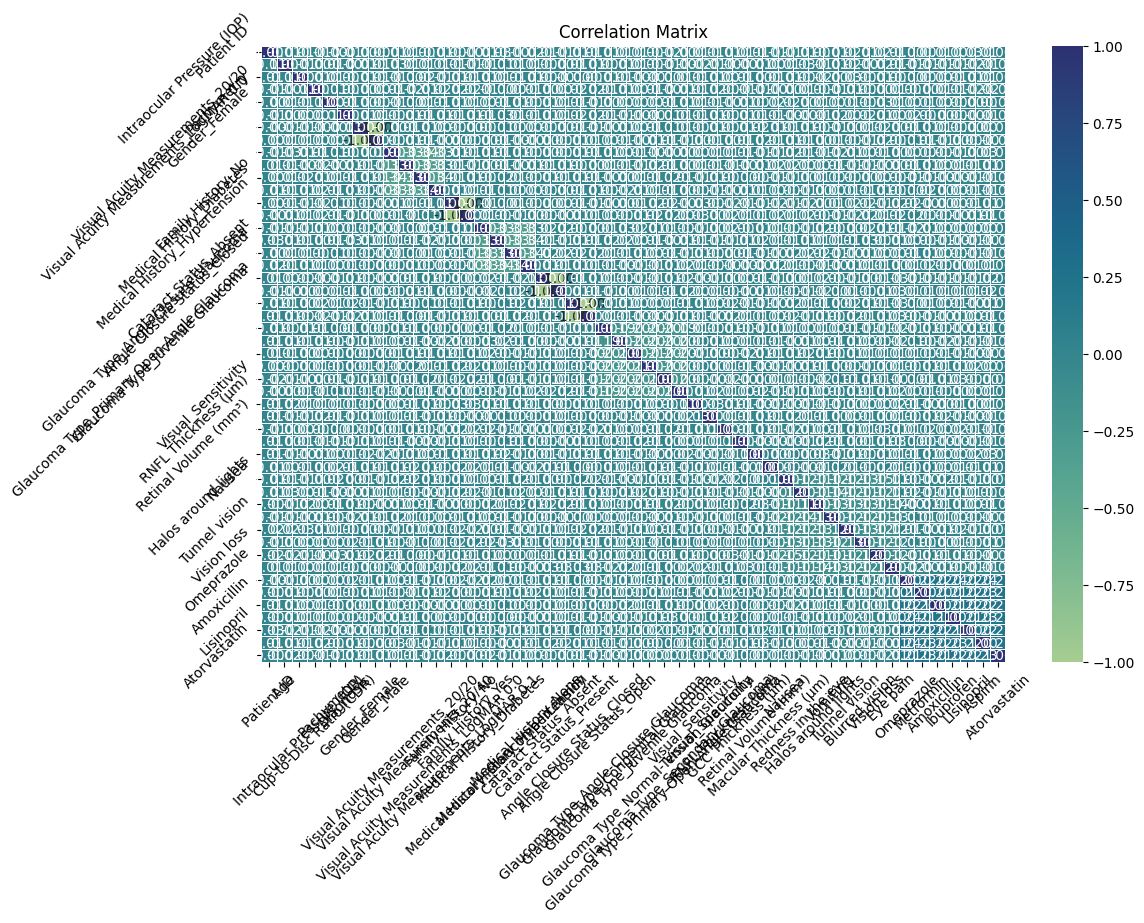

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='crest', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [30]:
correlation_with_diagnosis = correlation_matrix['Diagnosis'].sort_values(ascending=False)
print(correlation_with_diagnosis)

Diagnosis                                    1.000000
Blurred vision                               0.022749
Omeprazole                                   0.021134
Angle Closure Status_Closed                  0.017912
Glaucoma Type_Angle-Closure Glaucoma         0.014514
Visual Acuity Measurements_LogMAR 0.0        0.013679
Glaucoma Type_Secondary Glaucoma             0.013471
Retinal Volume (mm³)                         0.013186
Cataract Status_Present                      0.010825
Macular Thickness (µm)                       0.010508
Medical History_Hypertension                 0.009291
Pachymetry                                   0.008990
Medical History_Diabetes                     0.008506
Medical History_None                         0.008202
Family History_No                            0.008102
Visual_Sensitivity                           0.007020
Gender_Male                                  0.006959
Visual Acuity Measurements_20/20             0.004284
Eye pain                    

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7015, 48)
Shape of X_test: (1754, 48)
Shape of y_train: (7015,)
Shape of y_test: (1754,)


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5114025085518814
Precision: 0.5291828793774319
Recall: 0.4523281596452328
F1 Score: 0.4877465630603706


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Train the logistic regression classifier
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.4903078677309008
Precision: 0.512987012987013
Recall: 0.17516629711751663
F1 Score: 0.2611570247933884


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5068415051311288
Precision: 0.5288611544461779
Recall: 0.37583148558758317
F1 Score: 0.439403758911212


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()

# Train the Gradient Boosting Classifier
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5
Precision: 0.5152625152625152
Recall: 0.4678492239467849
F1 Score: 0.49041255084253343


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.49543899657924745
Precision: 0.5099882491186839
Recall: 0.4811529933481153
F1 Score: 0.49515116942384485


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.49543899657924745
Precision: 0.5110246433203631
Recall: 0.43680709534368073
F1 Score: 0.47101016138673046


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.48973774230330674
Precision: 0.5041816009557945
Recall: 0.4678492239467849
F1 Score: 0.4853364002300173
